In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv("netflix_titles.csv")
# # df.head()
# df.info()

# df.describe()
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

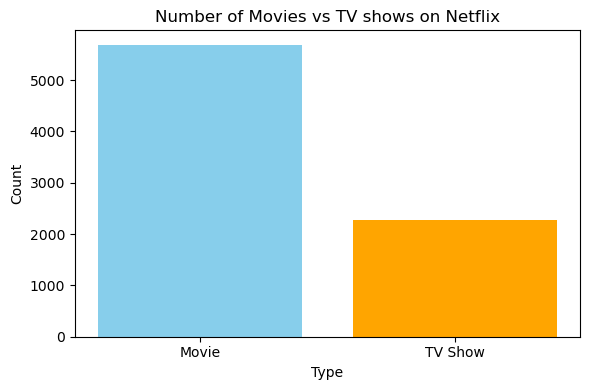

In [10]:
# clean data
df = df.dropna(subset= ["type", "release_year", "rating", "country", "duration"])

type_counts = df["type"].value_counts()

plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color=["skyblue", "orange"])
plt.title("Number of Movies vs TV shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("movies_vs_tvshows.png")

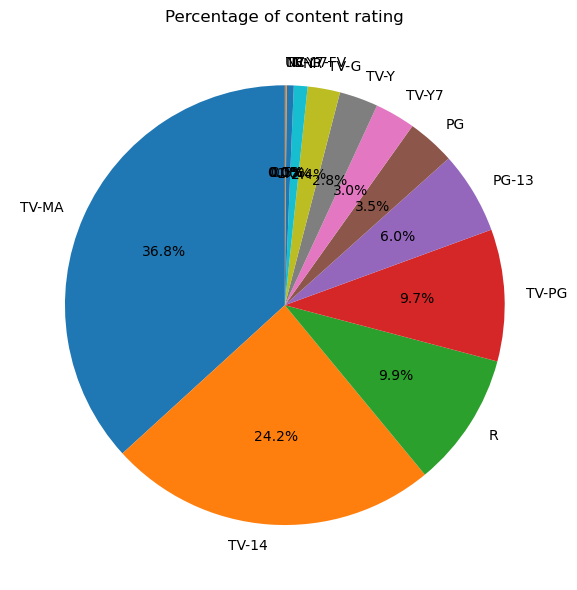

In [18]:
rating_counts = df["rating"].value_counts()
# rating_counts
plt.figure(figsize=(8,6))
plt.pie(rating_counts, labels=rating_counts.index,autopct="%1.1f%%", startangle=90)

plt.title("Percentage of content rating")
plt.tight_layout()
plt.savefig("content_rating.png")

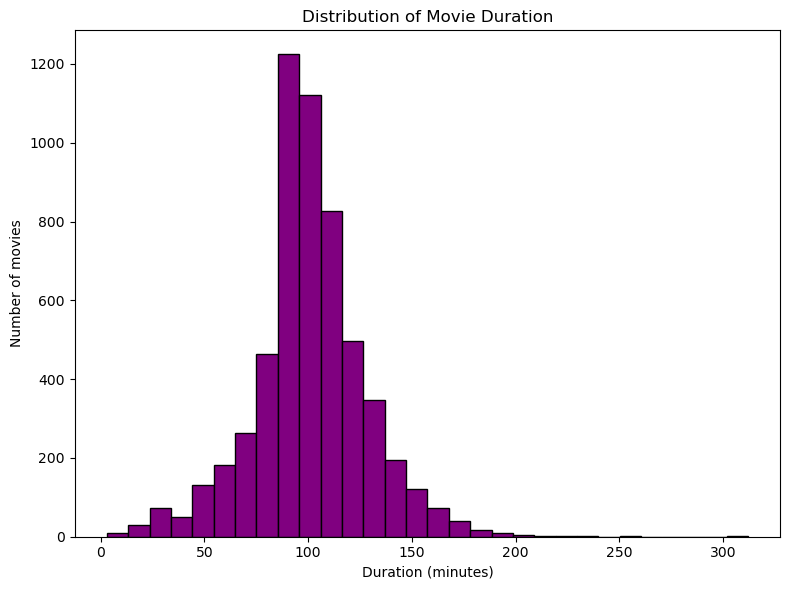

In [13]:
movie_df = df[df['type'] == "Movie"].copy()
movie_df["duration_int"] = movie_df["duration"].str.replace('min', '').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'], bins=30, color='purple', edgecolor='black')
plt.title("Distribution of Movie Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of movies")
plt.tight_layout()
plt.savefig("movie_duration_histogram.png")

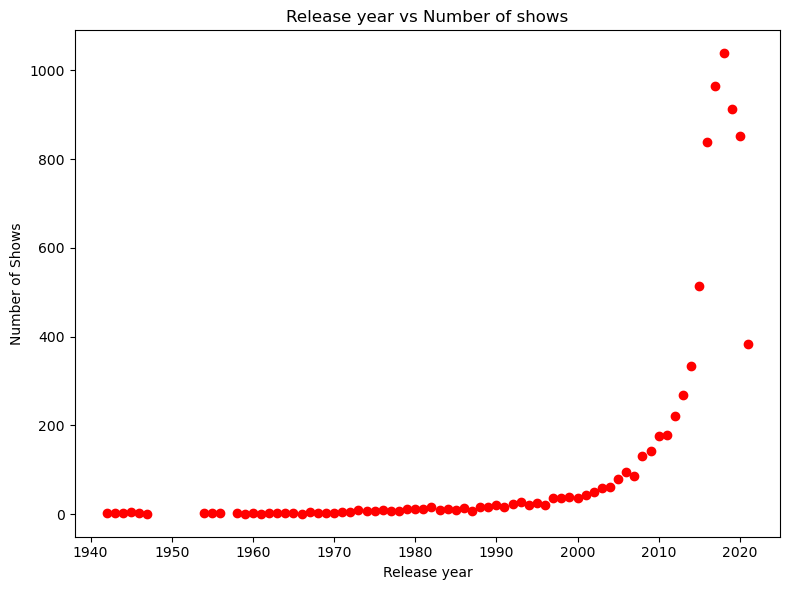

In [20]:
release_counts= df['release_year'].value_counts().sort_index()
plt.figure(figsize=(8,6))
plt.scatter(release_counts.index, release_counts.values, color='red')

plt.title("Release year vs Number of shows")
plt.xlabel("Release year")
plt.ylabel("Number of Shows")
plt.tight_layout()
plt.savefig("release_year_vs_number_of_shows.png")

In [21]:
df.head()


show_id     type                          title         director  \
0      s1    Movie           Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show                  Blood & Water              NaN   
4      s5  TV Show                   Kota Factory              NaN   
7      s8    Movie                        Sankofa     Haile Gerima   
8      s9  TV Show  The Great British Baking Show  Andy Devonshire   

                                                cast  \
0                                                NaN   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   
7  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8  Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   

                                             country          date_added  \
0                                      United States  September 25, 2021   
1                                       South Africa  September 24, 2021   
4                                              India  September 24, 2021   
7  United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
8                                     United Kingdom  September 24, 2021   

   release_year rating   duration  \
0          2020  PG-13     90 min   
1          2021  TV-MA  2 Seasons   
4          2021  TV-MA  2 Seasons   
7          1993  TV-MA    125 min   
8          2021  TV-14  9 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
4  International TV Shows, Romantic TV Shows, TV ...   
7   Dramas, Independent Movies, International Movies   
8                       British TV Shows, Reality TV   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
4  In a city of coaching centers known to train I...  
7  On a photo shoot in Ghana, an American model s...  
8  A talented batch of amateur bakers face off in...

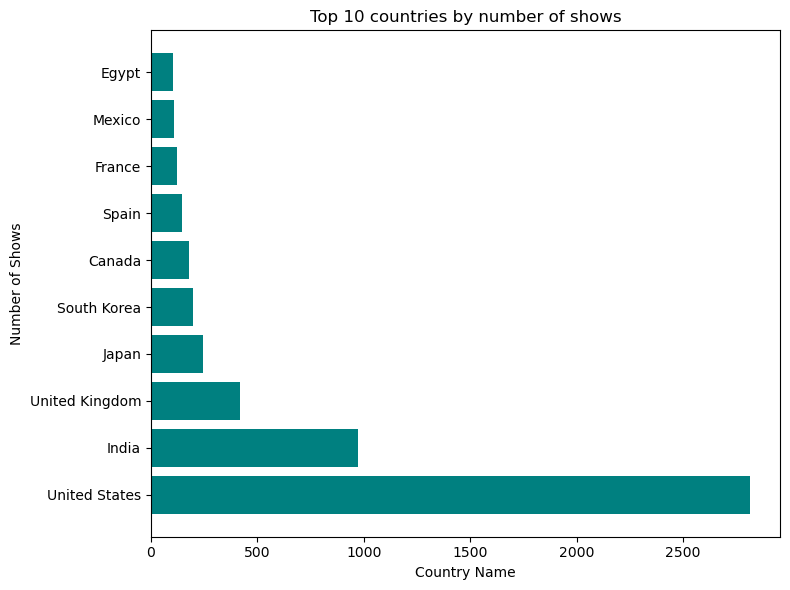

In [25]:
country_counts= df['country'].value_counts().head(10)
# country_counts
plt.figure(figsize=(8,6))
plt.barh(country_counts.index, country_counts.values, color='teal')
plt.title("Top 10 countries by number of shows")
plt.xlabel("Country Name")
plt.ylabel("Number of Shows")
plt.tight_layout()
plt.savefig("top10Country.png")
plt.show()

In [33]:
content_by_year= df.groupby(['release_year', 'type']).size().unstack().fillna(0)
content_by_year

type          Movie  TV Show
release_year                
1942            2.0      0.0
1943            3.0      0.0
1944            3.0      0.0
1945            3.0      1.0
1946            1.0      1.0
...             ...      ...
2017          729.0    236.0
2018          713.0    325.0
2019          565.0    348.0
2020          461.0    391.0
2021          169.0    214.0

[73 rows x 2 columns]

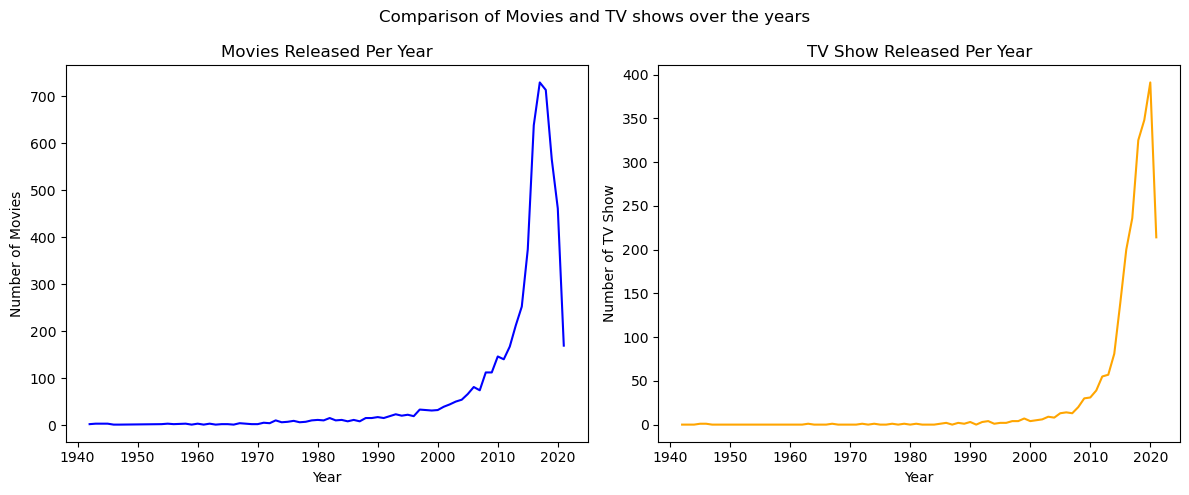

In [39]:
fig, ax= plt.subplots(1,2, figsize=(12,5))

# first sub plot: movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color= 'blue')
ax[0].set_title("Movies Released Per Year")
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

# second sub plot: tv shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color= 'orange')
ax[1].set_title("TV Show Released Per Year")
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of TV Show')

fig.suptitle("Comparison of Movies and TV shows over the years") 
plt.tight_layout()
plt.savefig("movies_tv_shows_comparison.png")
plt.show()